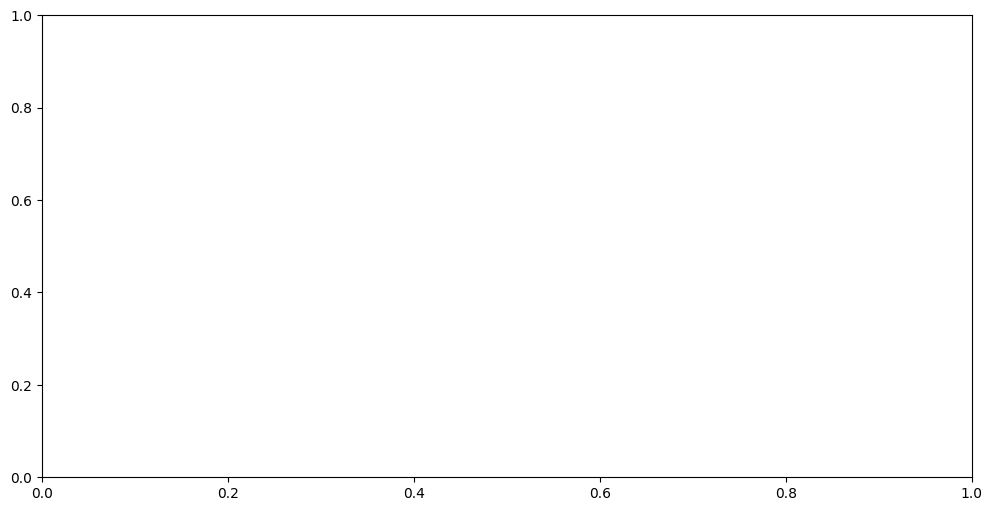

c:\Users\tsuku\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
url = "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)
data = {
    "country": ["United States", "Russia", "Germany", "France", "Israel"],
    1900: [1_500_000, 5_000_000, 600_000, 80_000, 50_000],
    1939: [4_800_000, 3_000_000, 500_000, 300_000, 450_000],
    1945: [5_500_000, 2_000_000, 50_000, 200_000, 600_000],
    1950: [5_800_000, 2_500_000, 30_000, 300_000, 1_200_000],
    1990: [5_900_000, 1_500_000, 100_000, 530_000, 4_800_000],
    2020: [6_000_000, 150_000, 118_000, 450_000, 7_200_000]
}
df = pd.DataFrame(data)
world = world.merge(df, how="left", left_on="NAME", right_on="country")
fig, ax = plt.subplots(figsize=(12, 6))

def update(year):
    ax.clear()
    ax.set_title(f"Численность еврейского населения по странам в {year} году")
    world.plot(column=year, cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
years = [1900, 1939, 1945, 1950, 1990, 2020]
ani = animation.FuncAnimation(fig, update, frames=years, repeat=True)
plt.show()
ani.save("jewish_population.gif", writer="pillow")
